<a href="https://colab.research.google.com/github/comunicafrsf/fourier/blob/main/Senoidales_aditivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

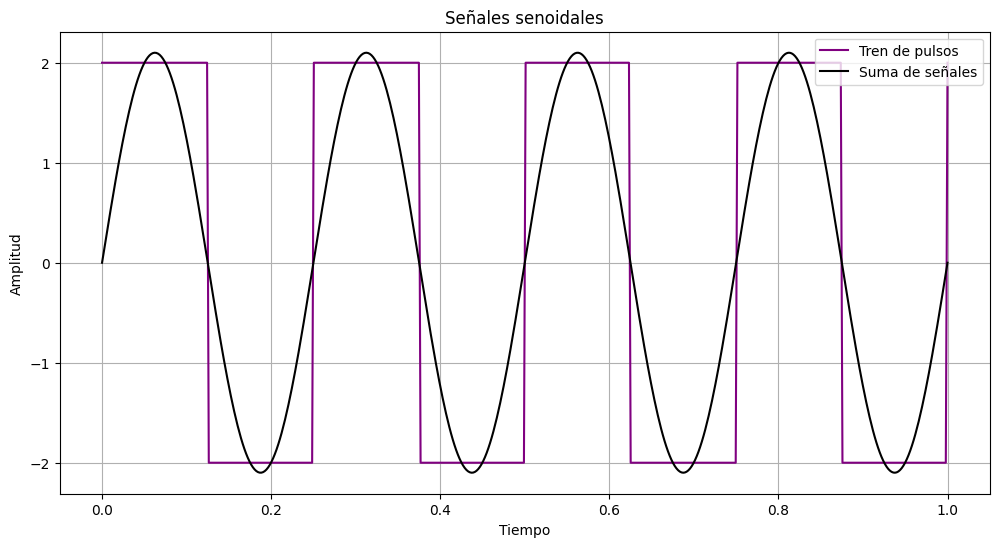

In [ ]:
#@title Texto de título predeterminado { run: "auto" }
A1 = 2.1 #@param {type:"number"}
f1 = 4 #@param {type:"number"}
phi1 = 0 #@param {type:"number"}

A2 = 0 #@param {type:"number"}
f2 = 12 #@param {type:"number"}
phi2 = 0 #@param {type:"number"}

A3 = 0 #@param {type:"number"}
f3 = 20 #@param {type:"number"}
phi3 = 0 #@param {type:"number"}

A4 = 4 #@param {type:"number"}
dc4 = 0.5 #@param {type:"number"}
f4 = 4 #@param {type:"number"}

ctte4 = -2 #@param {type:"number"}
print_sin = False #@param {type:"boolean"}
print_trenpulsos = True #@param {type:"boolean"}
print_sin_aditiva = True #@param {type:"boolean"}

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

class TrenDePulsos:
    def __init__(self, amplitud, duty_cycle, frecuencia, constante):
        self.amplitud = amplitud
        self.duty_cycle = duty_cycle
        self.frecuencia = frecuencia
        self.constante = constante

    def __call__(self, t):
        t_on = self.duty_cycle/self.frecuencia
        t_off = (1 - self.duty_cycle)/self.frecuencia
        t_per = t_on + t_off
        t = np.mod(t , t_per)
        y = np.where(t <= t_on, self.amplitud+self.constante, self.constante)
        return y


class Senoidal:
    def __init__(self, A, f, phi):
        self.A = A
        self.f = f
        self.phi = phi
    
    def __call__(self, t):
        return self.A * np.sin(2*np.pi*self.f*t + self.phi)

def sumatoria_senoidales(t, senoidales):
    y = 0
    for s in senoidales:
        y += s(t)
    return y

#tren_pulsos = TrenDePulsos(A4, dc, f4, ctte4)
senoidal1 = Senoidal(1, 1, 0)
senoidal2 = Senoidal(2, 2, 0)
senoidal3 = Senoidal(0.5, 3, 0)

def plot_seniales(A1, f1, phi1, A2, f2, phi2, A3, f3, phi3, A4, f4, dc4, ctte4):
    # Rango de tiempo
    t = np.linspace(0, 1, 500)
    
    senoidal1.A, senoidal1.f, senoidal1.phi = A1, f1, phi3
    senoidal2.A, senoidal2.f, senoidal2.phi = A2, f2, phi2
    senoidal3.A, senoidal3.f, senoidal3.phi = A3, f3, phi3
    #senoidal3.A, senoidal3.f, senoidal3.phi = A4, f4, dc4, ctte4
    
    # Señales
    s1 = Senoidal(A1, f1, phi1).__call__(t)
    s2 = Senoidal(A2, f2, phi2).__call__(t)
    s3 = Senoidal(A3, f3, phi3).__call__(t)
    s4 = TrenDePulsos(A4, dc4, f4, ctte4).__call__(t)

    senoidales = [senoidal1, senoidal2, senoidal3]
    
    s_sum = sumatoria_senoidales(t, senoidales)

    fig, ax = plt.subplots(figsize=(12, 6))
    if print_trenpulsos != False:
        ax.plot(t, s4, color='purple', label='Tren de pulsos')
    if print_sin != False:     
        ax.plot(t, s1, color='blue', label='Señal 1')
        ax.plot(t, s2, color='green', label='Señal 2')
        ax.plot(t, s3, color='red', label='Señal 3')
    if print_sin_aditiva != False:
        ax.plot(t, s_sum, color='black', label='Suma de señales')
    ax.legend(loc='upper right')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Amplitud')
    ax.set_title('Señales senoidales')
    ax.yaxis.set_ticks_position('left')
    ax.grid()
    plt.show()

plot_seniales(A1, f1, phi1, A2, f2, phi2, A3, f3, phi3, A4, f4, dc4, ctte4)